## HOUSE PRICES - Advanced Regression Techniques
Previsão do preço de venda de casas  
Dataset fornecido pelo Kaggle:  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### Introdução
O dataset possui 79 variáveis explanatórias que descrevem características de residências em Ames, Iowa. A competição desafia-nos a predizer o preço final real de cada casa.

O Kaggle fornece um dataset de treino, ou faremos previsões e iremos conferir quão próximo dos resultados reais nosso modelo atingiu. Depois, utilizaremos o dataset de testes e com o resultado faremos a submissão no Kaggle para avaliar a pontuação que o modelo conseguiu atingir.

## Etapa de Importação dos Dados

In [1]:
## Importando as primeiras bibliotecas necessárias
import warnings
import sklearn as sl
warnings.filterwarnings("ignore")
sl.__version__

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

from dython.nominal import associations

## Importação do arquivo de treino e entendimento dos dados a serem trabalhados

In [2]:
## Carregando os arquivos csv usando Pandas
treino = pd.read_csv('train.csv')

In [3]:
## Avaliando as 10 primeiras linhas do dataset
pd.set_option('display.max_columns', None)
treino.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
## Visualizando as dimensões da matriz de dados carregada
treino.shape

(1460, 81)

In [5]:
## Avaliando o tipo de dados da cada atributor
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA (Exploratory Data Analysis)
#### Como são muitas variáveis, primeiramente será necessário avaliar as variáveis que mais se correlacionam com a variável SalesPrice

In [6]:
## Primeiramente, vamos retirar as variáveis categóricas e avaliar a correlação dessas com a variável SalesPrice
## Utilizando a biblioteca dython conseguimos identificar e correlacionar variáveis categóricas
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(treino)

In [7]:
## Após separar as variáveis categóricas, incluir a variável SalesPrice para criar a correlação com esta
treino2 = treino[categorical_features]
treino2['SalePrice'] = treino['SalePrice']

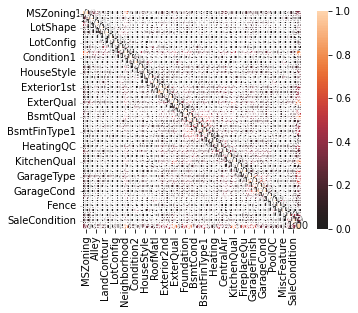

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
MSZoning,1.00,0.25,0.39,0.15,0.10,0.00,0.06,0.07,0.64,0.07,0.06,0.19,0.18,0.07,0.00,0.18,0.19,0.10,0.24,0.08,0.22,0.16,0.08,0.06,0.13,0.04,0.05,0.12,0.30,0.10,0.17,0.00,0.12,0.21,0.19,0.13,0.10,0.22,0.00,0.03,0.00,0.15,0.14,0.33
Street,0.25,1.00,0.00,0.03,0.11,0.00,0.00,0.18,0.20,0.16,0.00,0.11,0.02,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.04,0.00,0.00,0.09,0.00,0.10,0.00,0.02,0.04,0.00,0.06,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.11,0.10,0.04
Alley,0.39,0.00,1.00,0.08,0.07,0.00,0.03,0.00,0.43,0.13,0.00,0.15,0.14,0.11,0.00,0.21,0.20,0.09,0.11,0.04,0.22,0.13,0.08,0.08,0.11,0.00,0.12,0.09,0.20,0.13,0.09,0.03,0.07,0.20,0.14,0.12,0.14,0.18,0.00,0.00,0.00,0.04,0.06,0.14
LotShape,0.15,0.03,0.08,1.00,0.13,0.00,0.22,0.12,0.24,0.10,0.00,0.08,0.07,0.04,0.19,0.08,0.09,0.06,0.11,0.00,0.12,0.14,0.06,0.11,0.06,0.07,0.03,0.05,0.11,0.11,0.09,0.00,0.12,0.14,0.14,0.08,0.05,0.08,0.09,0.03,0.00,0.00,0.00,0.28
LandContour,0.10,0.11,0.07,0.13,1.00,0.00,0.06,0.46,0.36,0.00,0.06,0.07,0.13,0.14,0.18,0.12,0.12,0.09,0.13,0.00,0.10,0.09,0.06,0.19,0.09,0.00,0.00,0.05,0.13,0.04,0.10,0.00,0.08,0.12,0.10,0.04,0.00,0.12,0.00,0.03,0.00,0.03,0.11,0.16
Utilities,0.00,0.00,0.00,0.00,0.00,1.00,0.08,0.00,0.10,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.03,0.00,0.08,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.08,0.01
LotConfig,0.06,0.00,0.03,0.22,0.06,0.08,1.00,0.08,0.14,0.15,0.09,0.07,0.00,0.07,0.08,0.05,0.08,0.00,0.01,0.00,0.04,0.07,0.00,0.05,0.05,0.00,0.00,0.01,0.06,0.00,0.00,0.00,0.05,0.06,0.03,0.02,0.05,0.03,0.02,0.00,0.00,0.00,0.03,0.14
LandSlope,0.07,0.18,0.00,0.12,0.46,0.00,0.08,1.00,0.32,0.00,0.00,0.03,0.00,0.26,0.31,0.13,0.12,0.04,0.09,0.00,0.05,0.00,0.13,0.22,0.04,0.08,0.00,0.05,0.00,0.00,0.04,0.07,0.03,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.05
Neighborhood,0.64,0.20,0.43,0.24,0.36,0.10,0.14,0.32,1.00,0.18,0.01,0.42,0.29,0.19,0.10,0.29,0.32,0.33,0.49,0.15,0.42,0.47,0.13,0.24,0.29,0.15,0.05,0.30,0.38,0.17,0.44,0.08,0.30,0.30,0.42,0.20,0.17,0.31,0.05,0.18,0.00,0.17,0.22,0.74
Condition1,0.07,0.16,0.13,0.10,0.00,0.00,0.15,0.00,0.18,1.00,0.21,0.08,0.08,0.08,0.08,0.07,0.08,0.02,0.12,0.02,0.08,0.13,0.04,0.06,0.05,0.02,0.00,0.16,0.04,0.01,0.08,0.00,0.00,0.09,0.12,0.03,0.03,0.10,0.07,0.03,0.08,0.03,0.00,0.18


In [8]:
## Gerar a correlação e depois o mapa de calor de cada uma dessas 
complete_correlation= associations(treino2)

df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<AxesSubplot:>

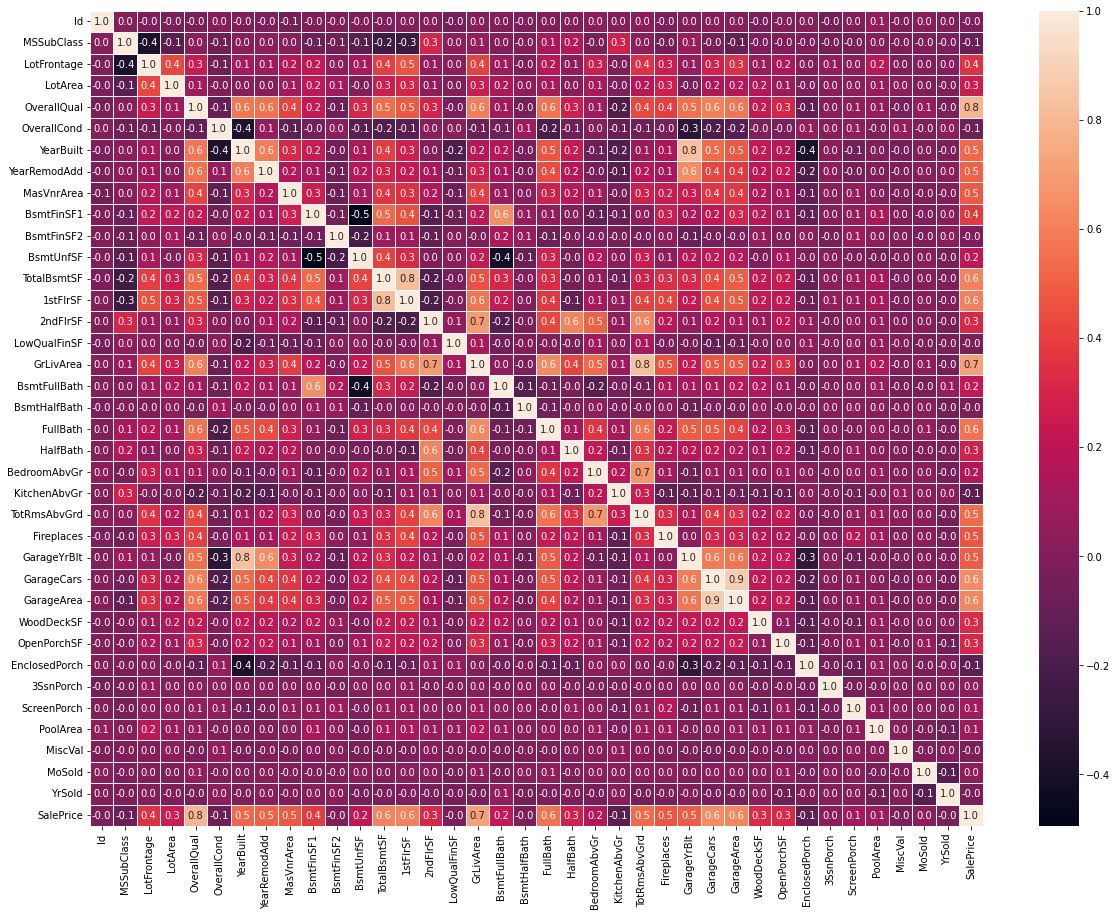

In [9]:
# Matriz de Correlação das variáveis numéricas
# Utilizando o médoto de Pearson
correlations = treino.corr()

f, ax = plt.subplots(figsize = (20,15))

plot = sn.heatmap(correlations, annot = True, fmt=".1f", linewidths=.6)
plot

In [10]:
## Algumas variáveis possuem muitos valores NA, mas antes de desconsiderá-las, precisamos avaliar se são significativas
## para o valor do preço

## Uma breve pesquisa mostra que no mercado, geralmente casas com piscina possuem um valor de mercado acima da média.
## Isto pelo fato da casa possuir um item de lazer próprio que atrai familias, amigos, etc. tornando o local mais convidativo

## Iniciando com a variável relacionada a Qualidade de Piscina da casa
## Vamos alterar as variáveis categóricas para numéricas, em que 0 é o pior nível e 5 é o maior nível
treino['PoolQC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'],
                        [5, 4, 3, 2, 1], inplace=True)

treino['PoolQC'] = treino['PoolQC'].fillna(0)

## Casas com piscina
treino_com_piscina = treino[treino['PoolQC'] > 0]

print('Média de valor das casas com piscina no dataset: ', treino_com_piscina['SalePrice'].mean())

## Casas sem piscina
treino_sem_piscina = treino[treino['PoolQC'] == 0]

print('Média de valor das casas com piscina no dataset: ', treino_sem_piscina['SalePrice'].mean())

percentual = treino_com_piscina['SalePrice'].mean()/treino_sem_piscina['SalePrice'].mean()
print(percentual)

Média de valor das casas com piscina no dataset:  288138.5714285714
Média de valor das casas com piscina no dataset:  180404.66345492084
1.5971791743652508


No dataset apresentado, o custo média das casas com piscina é de 59% acima dos custos de uma casa sem piscina. Não sabemos se é casualidade, então poderíamos fazer a correção de 60% para casa com piscinas no dataset de treino para testar essa hipótese.

In [11]:
## Valor avaliar a variável Alley
## Vamos alterar as variáveis categóricas para numéricas
treino['Alley'].replace(['Grvl', 'Pave', 'NA'],
                        [3, 2, 1], inplace=True)

treino['Alley'] = treino['Alley'].fillna(0)

## Casas com Alley Gravel
alley_grvl = treino[treino['Alley'] == 3]

print('Média de valor de casas com Alley Gravel: ', alley_grvl['SalePrice'].mean())


## Casas com Alley Paved
alley_pave = treino[treino['Alley'] == 2]

print('Média de valor de casas com Alley Paved: ', alley_pave['SalePrice'].mean())


## Casas with NA on Alley
alley_NA = treino[treino['Alley'] > 0]

print('Média de valor de casas with NA on Alley: ', alley_NA['SalePrice'].mean())

Média de valor de casas com Alley Gravel:  122219.08
Média de valor de casas com Alley Paved:  168000.58536585365
Média de valor de casas with NA on Alley:  142845.9120879121


Como não existe uma alteração muito significante nos valores das casas com Alley Gravel ou Alley Paved, e essa variável não apresenta uma correlação muito significativa com a variável SalesPrice, não vamos considerá-la

In [12]:
## Por ultimo, vamos avaliar o valor médio por square feet de cada bairro. Desta forma, conseguiremos colocar os bairros 
## em ordem de mais caro para o mais barato
dfAgrupado_porBairro = treino.groupby("Neighborhood")

somasAgrupado = dfAgrupado_porBairro.sum()

somaTotalArea = somasAgrupado['MasVnrArea'] + somasAgrupado['TotalBsmtSF'] + somasAgrupado['GrLivArea'] + somasAgrupado['GarageArea'] + somasAgrupado['WoodDeckSF'] + somasAgrupado['OpenPorchSF'] + somasAgrupado['EnclosedPorch'] + somasAgrupado['3SsnPorch'] + somasAgrupado['ScreenPorch'] + somasAgrupado['PoolArea']

custoporSqrfeet = somasAgrupado['SalePrice'] / somaTotalArea

## SquareFeet de área construída, do mais barato para o mais caro por bairro
custoporSqrfeet.sort_values()

Neighborhood
IDOTRR     42.219842
BrDale     43.632236
OldTown    44.612052
SWISU      45.149566
MeadowV    45.857049
Edwards    46.186157
NAmes      48.543633
Sawyer     49.253329
NWAmes     49.313943
Mitchel    50.215006
NPkVill    51.734209
BrkSide    51.937700
Blueste    52.014375
ClearCr    54.598954
SawyerW    54.735923
Blmngtn    56.126406
CollgCr    57.198129
Timber     59.000673
Crawfor    60.482089
Gilbert    60.940805
Somerst    61.138271
NoRidge    61.407204
Veenker    63.883349
NridgHt    65.341138
StoneBr    69.110354
dtype: float64

Agora conseguimos identificar e montar um sub dataset de treino com as variáveis que mais se correlacionam com a variável a ser prevista: SalePrice

## Feature Engineering

### Variáveis que serão mantidas, por possuírem uma maior correlação com a variável SalePrice de acordo com a matriz de correlação:
Neighborhood  
ExterQual  
Foundation  
BsmtQual  
KitchenQual  
FireplaceQu  
GarageType  
GarageFinish  
OverallQual  
YearBuilt  
YearRemodAdd  
MasVnrArea  
TotalBsmtSF  
1stFlrSF  
GrLivArea  
FullBath  
TotRmsAbvGrd  
Fireplaces  
GarageYrBlt  
GarageCars  
GarageArea  


In [13]:
## Algumas variáveis categóricas podem ser convertidas em numéricas
## Avaliando o dataset e as descrições das variáveis através do Kaggle, algumas variáveis serão convertidas

treino['ExterQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

# uma pesquisa no Google mostra que o custo e qualidade dessas funções estão na ordem do melhor para o pior
treino['Foundation'].replace(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
                        [6, 5, 4, 3, 2, 1], inplace=True)

treino['BsmtQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

treino['BsmtQual'] = treino['BsmtQual'].fillna(0)

# em programas de reforma de casas americanos, podemos ver que a qualidade da cozinha é algo extremamente importante
# para as famílias, então esta variável é de extrama importância. 
treino['KitchenQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

# outra variável importante que podemos notar em séries de reformas de casas é a qualidade da lareira. Não temos essa 
# necessidade em casas brasileiras mas os americanos levam muito em conta. 5 para a melhor qualidade / 0 para sem lareira
treino['FireplaceQu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

treino['FireplaceQu'] = treino['FireplaceQu'].fillna(0)


# Qualidades e Tipo de Garagem
treino['GarageFinish'].replace(['Fin', 'RFn', 'Unf'],
                        [3, 2, 1], inplace=True)

treino['GarageFinish'] = treino['GarageFinish'].fillna(0)


treino['GarageType'].replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'],
                        [6, 5, 4, 3, 2, 1], inplace=True)

treino['GarageType'] = treino['GarageType'].fillna(0)

## Bairro de acordo com o valor do sqrfeet construído
treino['Neighborhood'].replace(['IDOTRR', 'BrDale', 'OldTown', 'SWISU', 'MeadowV', 'Edwards', 'NAmes', 'Sawyer',
                               'NWAmes', 'Mitchel', 'NPkVill', 'BrkSide', 'Blueste', 'ClearCr', 'SawyerW', 'Blmngtn',
                               'CollgCr', 'Timber', 'Crawfor', 'Gilbert', 'Somerst', 'NoRidge', 'Veenker',
                               'NridgHt', 'StoneBr'],
                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 
                                17, 18, 19, 20, 21, 22, 23, 24, 25], inplace=True)

In [14]:
novoTreino = treino[['Neighborhood', 'ExterQual', 'Foundation', 'BsmtQual', 'KitchenQual',
                    'FireplaceQu', 'GarageType', 'GarageFinish', 'OverallQual', 'YearBuilt',
                    'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                    'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                    'GarageArea', 'SalePrice']]

In [15]:
## Vamos avaliar as variáveis nulas que temos em nosso dataset e tratá-las pois os modelos de machine learning
## não entendem essas variáveis NA
novoTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1460 non-null   int64  
 1   ExterQual     1460 non-null   int64  
 2   Foundation    1460 non-null   int64  
 3   BsmtQual      1460 non-null   float64
 4   KitchenQual   1460 non-null   int64  
 5   FireplaceQu   1460 non-null   float64
 6   GarageType    1460 non-null   float64
 7   GarageFinish  1460 non-null   float64
 8   OverallQual   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  MasVnrArea    1452 non-null   float64
 12  TotalBsmtSF   1460 non-null   int64  
 13  1stFlrSF      1460 non-null   int64  
 14  GrLivArea     1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageYrBlt   1379 non-null 

Ainda existem duas variáveis com valores NA  
1. Ano de Construção da garagem
2. Área da alvenaria

Fazendo uma avaliação no mapa de calor e correlação entre as variáveis, vemos uma forte correlação positiva entre a variável ano de construção da garagem com o ano de construção da casa ou ano de reforma da casa

<AxesSubplot:>

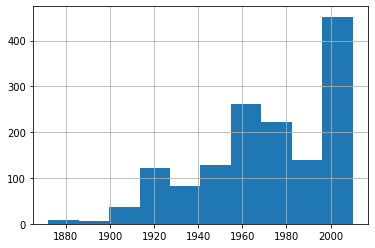

In [16]:
novoTreino['YearBuilt'].hist()

<AxesSubplot:>

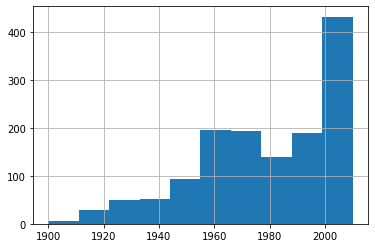

In [17]:
novoTreino['GarageYrBlt'].hist()

In [18]:
## Avaliando as variáveis lado a lado, verificamos que existe uma real forte correlação, então podemos descartar 
## duas dessas variáveis e evitar o possível overfitting
amostraNovoTreino = novoTreino.sample(n=100)

amostraNovoTreino = amostraNovoTreino[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

amostraNovoTreino.head(100)

,YearBuilt,YearRemodAdd,GarageYrBlt
1195,2005,2005,2005.0
1139,1920,1950,1972.0
821,1953,1953,1974.0
289,1915,2003,2003.0
759,1995,1995,1995.0
...,...,...,...
922,2005,2006,2005.0
999,2006,2006,2006.0
28,1957,1997,1957.0
41,1959,1959,1959.0


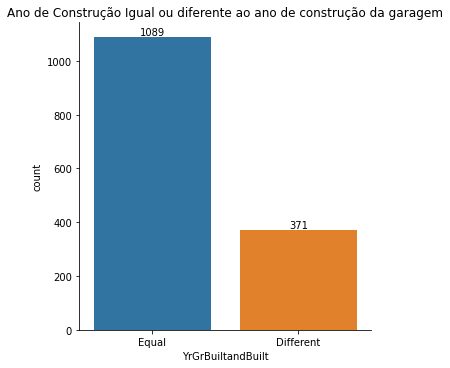

In [19]:
## Avaliando superficialmente, existe um grande número de Ano de Construção de garagem que coincide com o número de 
## construção. Vamos verificar através de um gráfico

novoTreioTeste = novoTreino

novoTreioTeste.loc[novoTreioTeste['YearBuilt'] == novoTreioTeste['GarageYrBlt'], 'YrGrBuiltandBuilt'] = 'Equal'
novoTreioTeste.loc[novoTreioTeste['YearBuilt'] != novoTreioTeste['GarageYrBlt'], 'YrGrBuiltandBuilt'] = 'Different'

novoTreioTeste['YrGrBuiltandBuilt']

g = sn.catplot(x="YrGrBuiltandBuilt",kind="count", data=novoTreioTeste)
g.set(title="Ano de Construção Igual ou diferente ao ano de construção da garagem")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [20]:
## Antes de simplesmente jogar o valor do ano da construção onde esteja NA no ano de construção da garagem
# vamos fazer outra avaliação: 

novoTreino['GarageYrBlt'] = novoTreino['GarageYrBlt'].fillna(0)

novoTreioTeste = novoTreino

novoTreioTeste.loc[novoTreioTeste['GarageArea'] == 0, 'Sem_Garagem'] = 'Verdadeiro'
novoTreioTeste.loc[novoTreioTeste['GarageArea'] > 0, 'Sem_Garagem'] = 'Falso'

In [21]:
novoTreioTeste['Sem_Garagem'].value_counts()

Falso         1379
Verdadeiro      81
Name: Sem_Garagem, dtype: int64

In [22]:
novoTreino['GarageYrBlt'].value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

Entende-se que 81 das variáveis que está com valor NA em "Ano de Construção da Garagem" devam ser as 81 variáveis que possuem uma area de garagem de 0, ou seja, não possuem garagem.  
  
Vamos deixar o valor de 0 para quando não possui garagem

In [23]:
## A variável MasVnrArea não possui forte correlação com outras variáveis. Por se tratar de apenas 8 variáveis NA
## vamos retirar as variáveis NA do dataset
novoTreino = novoTreino.dropna()

In [24]:
## Vamos tirar as colunas que foram criadas apenas para entender melhor os dados
novoTreino = novoTreino.drop(['Sem_Garagem', 'YrGrBuiltandBuilt'], axis=1)

In [25]:
## Podemos avaliar agora um dataset sem valores NA
novoTreino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1452 non-null   int64  
 1   ExterQual     1452 non-null   int64  
 2   Foundation    1452 non-null   int64  
 3   BsmtQual      1452 non-null   float64
 4   KitchenQual   1452 non-null   int64  
 5   FireplaceQu   1452 non-null   float64
 6   GarageType    1452 non-null   float64
 7   GarageFinish  1452 non-null   float64
 8   OverallQual   1452 non-null   int64  
 9   YearBuilt     1452 non-null   int64  
 10  YearRemodAdd  1452 non-null   int64  
 11  MasVnrArea    1452 non-null   float64
 12  TotalBsmtSF   1452 non-null   int64  
 13  1stFlrSF      1452 non-null   int64  
 14  GrLivArea     1452 non-null   int64  
 15  FullBath      1452 non-null   int64  
 16  TotRmsAbvGrd  1452 non-null   int64  
 17  Fireplaces    1452 non-null   int64  
 18  GarageYrBlt   1452 non-null 

É importante avaliar se existem outliers em cada um desses datasets e tratá-los conforme necessário

Necessário avaliar as variáveis que podem conter valores outliers. Para isso, vamos utilizar boxplots:

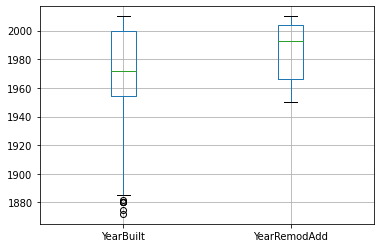

In [26]:
## Boxplot para algumas variáveis relacionadas a anos
boxplot = novoTreino.boxplot(column=['YearBuilt', 'YearRemodAdd'])

Nada anormal.. algumas casas construídas próximo ao ano de 1880, mas podem existir casas realmente antigas

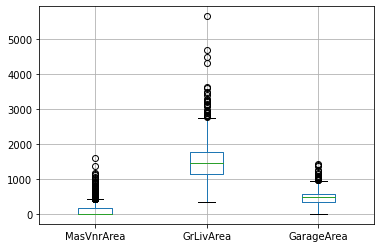

In [27]:
## Boxplot para algumas variáveis relacionadas a área
boxplot = novoTreino.boxplot(column=['MasVnrArea', 'GrLivArea', 'GarageArea'])

Também nada fora do normal.. para a variável GrLvArea, a média está próximo dos 1800 pés quadrados porém algumas casas possuem mais de 5000 pés quadrados. Apesar de ser um valor "fora do normal", em algumas pesquisas na internet podemos ver que existem essas "mansões" com um Living area deste tamanho. Mas vamos descartá-las para manter a variável com uma distribuição normal (Gaussiana)

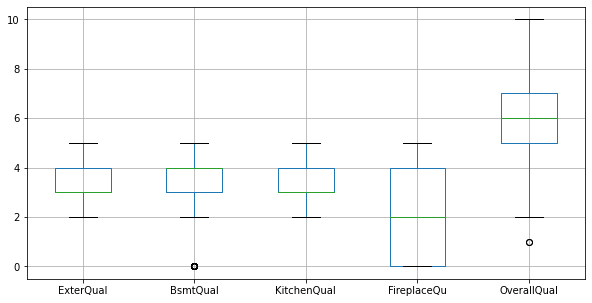

In [28]:
## Boxplot para algumas variáveis relacionadas a pontuação
boxplot = novoTreino.boxplot(column=['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu',
                                    'OverallQual'], figsize=(10,5))

In [29]:
## Vamos retirar os outliers para evitar problemas em nosso modelo preditivo
novoTreino = novoTreino.drop(novoTreino[novoTreino.GrLivArea > 2700].index)
novoTreino = novoTreino.drop(novoTreino[novoTreino.GarageArea > 1000].index)

Vamos avalir novamente a matriz de correlação, desta vez apenas com as variáveis mais se correlacionam com a variável desejada para predição SalePrice

<AxesSubplot:>

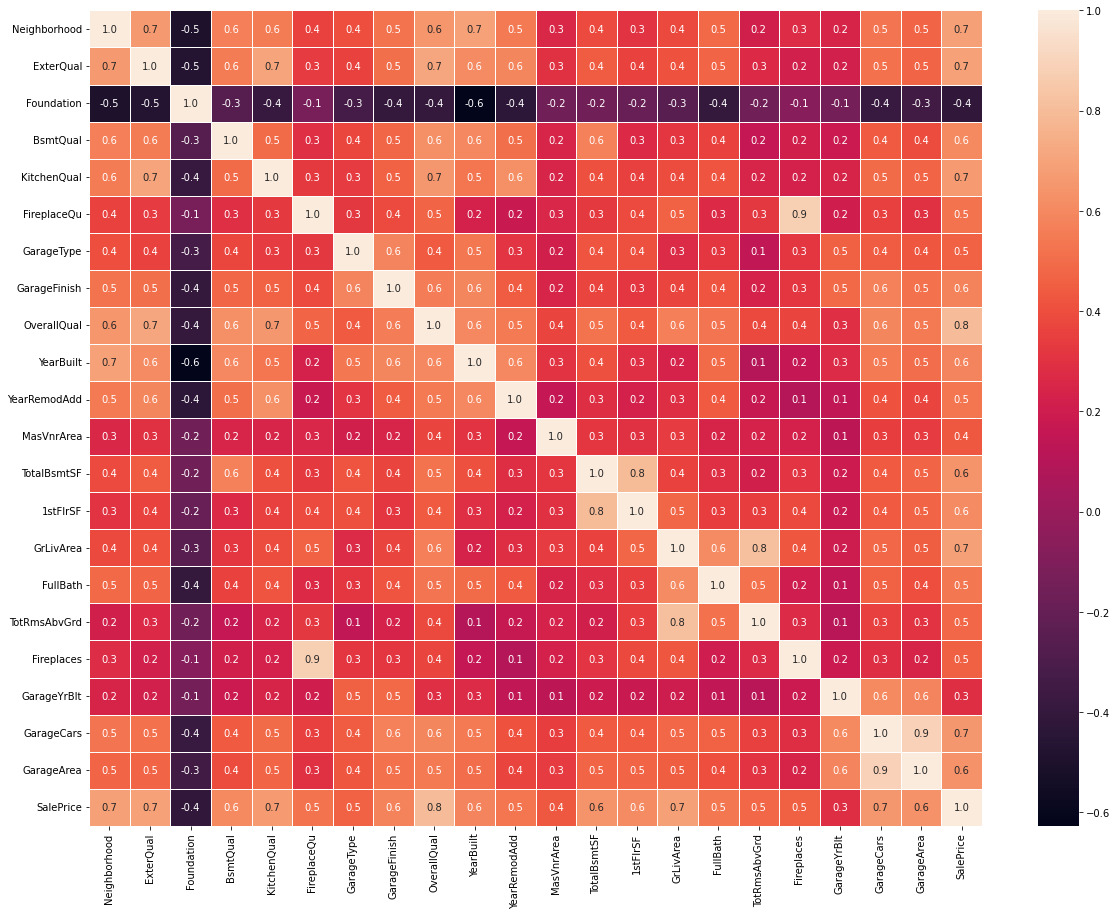

In [30]:
# Matriz de Correlação das variáveis numéricas
# Utilizando o médoto de pearson
correlations2 = novoTreino.corr()

f, ax = plt.subplots(figsize = (20,15))

plot = sn.heatmap(correlations2, annot = True, fmt=".1f", linewidths=.6)
plot

Os algoritmos de Machine Learning trabalham melhor em conjunto de dados com a distribuição de dados Gaussiana  
Vamos avaliar a variável SalePrice

<AxesSubplot:>

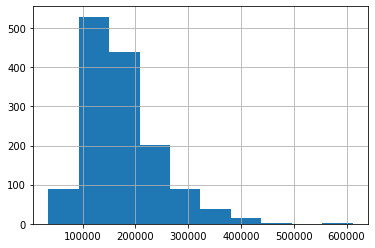

In [31]:
novoTreino["SalePrice"].hist()

É possível verificar uma assimetria positiva, ou seja, a curva maior para a direita. Não é interessante para os modelos de Machine Learning utilizar uma variável desta forma. Por este motivo, vamos fazer a operação de log(1+x) com a variável SalePrice para transformar em uma distribuição normal.

<AxesSubplot:>

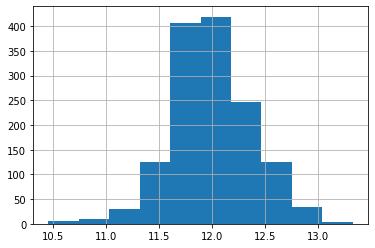

In [32]:
import numpy as np
novoTreino["SalePrice"] = np.log1p(novoTreino["SalePrice"])

novoTreino["SalePrice"].hist()

Vamos avaliar os outliers que podem atrapalhar os modelos de Machine Learning.

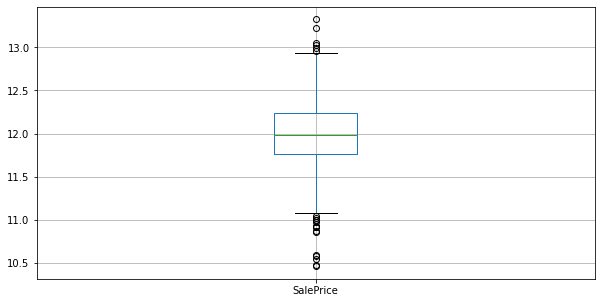

In [33]:
## Boxplot para algumas variáveis relacionadas a pontuação
boxplot = novoTreino.boxplot(column=['SalePrice'], figsize=(10,5))

Existem alguns outliers que serão retirados do dataset. 

In [34]:
novoTreino = novoTreino.drop(novoTreino[novoTreino.SalePrice > 13].index)
novoTreino = novoTreino.drop(novoTreino[novoTreino.SalePrice < 11].index)

<AxesSubplot:>

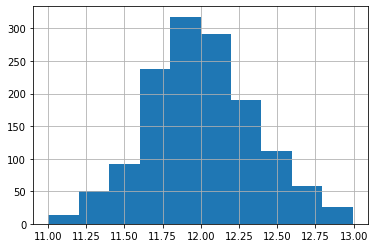

In [35]:
novoTreino["SalePrice"].hist()

Agora temos o distribuição normal, sem outliers e podemos partir para a preparação dos dados para Machine Learning

## Preparação dos Dados para Machine Learning

In [36]:
## Vamos avaliar como estão as variáveis que sobraram e a quantidade
novoTreino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1389 non-null   int64  
 1   ExterQual     1389 non-null   int64  
 2   Foundation    1389 non-null   int64  
 3   BsmtQual      1389 non-null   float64
 4   KitchenQual   1389 non-null   int64  
 5   FireplaceQu   1389 non-null   float64
 6   GarageType    1389 non-null   float64
 7   GarageFinish  1389 non-null   float64
 8   OverallQual   1389 non-null   int64  
 9   YearBuilt     1389 non-null   int64  
 10  YearRemodAdd  1389 non-null   int64  
 11  MasVnrArea    1389 non-null   float64
 12  TotalBsmtSF   1389 non-null   int64  
 13  1stFlrSF      1389 non-null   int64  
 14  GrLivArea     1389 non-null   int64  
 15  FullBath      1389 non-null   int64  
 16  TotRmsAbvGrd  1389 non-null   int64  
 17  Fireplaces    1389 non-null   int64  
 18  GarageYrBlt   1389 non-null 

#### MÉTODO KBEST

In [37]:
## Mesmo tendo a matriz de correlação, vamos ainda utilizar dois métodos para identificar quais as variáveis preditores
## Utilizando a biblioteca sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = novoTreino.values

# Separando o array em componentes de input e output
X = array[:,0:21]
Y = array[:,21]
Y=Y.astype('int') 

# Função para seleção de variáveis
best_var = SelectKBest(score_func = chi2, k = 5)

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(X, Y)

# Reduz X para os recursos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)

novoTreino.head()


Número original de features: 21

Número reduzido de features: 5

Features (Variáveis Selecionadas): 

 [[ 196.  856.  856. 1710.  548.]
 [   0. 1262. 1262. 1262.  460.]
 [ 162.  920.  920. 1786.  608.]
 ...
 [   0. 1152. 1188. 2340.  252.]
 [   0. 1078. 1078. 1078.  240.]
 [   0. 1256. 1256. 1256.  276.]]


,Neighborhood,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,17,4,4,4.0,4,0.0,5.0,2.0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,12.247699
1,23,3,5,4.0,3,3.0,5.0,2.0,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,12.109016
2,17,4,4,4.0,4,3.0,5.0,2.0,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,12.317171
3,19,3,6,3.0,4,4.0,1.0,1.0,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,11.849405
4,22,4,4,4.0,4,3.0,5.0,2.0,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,12.429220


#### MÉTODO RFE

In [38]:
## Mesmo tendo a matriz de correlação, vamos ainda utilizar dois métodos para identificar quais as variáveis preditores
## Utilizando a biblioteca sklearn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separando o array em componentes de input e output
X = array[:,0:21]
Y = array[:,21]
Y=Y.astype('int')

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 5)
fit = rfe.fit(X, Y)
    
# Print dos resultados
print("Variáveis Preditoras:", novoTreino.columns[0:21])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['Neighborhood', 'ExterQual', 'Foundation', 'BsmtQual', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')
Variáveis Selecionadas: [False False False False  True False False False  True False False False
 False False False  True False  True False  True False]
Ranking dos Atributos: [ 6  7  9  3  1  8  5  2  1 10 15 17 13 16 11  1  4  1 14  1 12]
Número de Melhores Atributos: 5


#### Temos então as seguintes possibilidade para criar nossos modelos de Machine Learning:
Segundo a matriz de correlação, vamos utilizar as seguintes variáveis preditoras:
1. Neighborhood
2. ExterQual
3. KitchenQual
4. GrLivArea
5. OverallQual

Segundo o método KBest, vamos utilizar as seguintes variáveis preditoras:
1. MasVnrArea
2. TotalBsmtSF
3. 1stFlrSF
4. GrLivArea
5. GarageArea

Segundo a método RFE, vamos utilizar as seguintes variáveis preditoras:
1. GarageCars
2. Fireplaces
3. FullBath
4. OverallQual
5. KitchenQual

Vamos avaliar também com todas as variáveis do Dataset após o feature engineering

### Definição e Seleção do Modelo Preditivo
Como temos muitas possíveis variáveis preditoras e diversos modelos possíveis para problemas de regressão linear, faremos vários testes para definir o melhor modelo Preditivo

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

#### Iniciando com as variáveis fornecidas pela matriz de correlação:

In [40]:
novoTreino2 = novoTreino[["Neighborhood", "ExterQual", "KitchenQual", "GrLivArea", "OverallQual", "SalePrice"]]
array = novoTreino2.values

In [41]:
## Regressão Linear

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = array[:,5]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.02675442482221612
O MAE do modelo é: 0.1257378898441524


In [42]:
## Ridge Regression

# Criando o modelo
modelo = Ridge()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.02674035019664279
O MAE do modelo é: 0.12571578030644381


In [43]:
## Lasso Regression

# Criando o modelo
modelo = Lasso()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.05673126330842586
O MAE do modelo é: 0.18047403037078305


In [44]:
## Elastic Regression

# Criando o modelo
modelo = ElasticNet()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.04085500120251461
O MAE do modelo é: 0.1525922213292639


In [45]:
## KNN

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.05377922247976814
O MAE do modelo é: 0.175378372606004


In [46]:
## SVM

# Criando o modelo
modelo = SVR()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.057240869646166065
O MAE do modelo é: 0.18152424778629395


#### Rodar o modelo com as variáveis fornecidas pelo método KBest

In [47]:
novoTreino3 = novoTreino[["MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea", "SalePrice"]]
array = novoTreino3.values

In [48]:
## Regressão Linear

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = array[:,5]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.038075644834316
O MAE do modelo é: 0.14416580189537279


In [49]:
## Ridge Regression

# Criando o modelo
modelo = Ridge()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.038075644883188244
O MAE do modelo é: 0.14416580210553348


In [50]:
## Lasso Regression

# Criando o modelo
modelo = Lasso()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.03848658501941416
O MAE do modelo é: 0.14542827678478476


In [51]:
## Elastic Regression

# Criando o modelo
modelo = ElasticNet()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.038257542820747996
O MAE do modelo é: 0.14476700438810064


In [52]:
## KNN

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.041941772827369224
O MAE do modelo é: 0.1489233157698833


In [53]:
## SVM

# Criando o modelo
modelo = SVR()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.0359472130469577
O MAE do modelo é: 0.13419350317361017


#### Rodar o modelo com as variáveis fornecidas pelo método RFE

In [54]:
novoTreino4 = novoTreino[["GarageCars", "Fireplaces", "FullBath", "OverallQual", "KitchenQual", "SalePrice"]]
array = novoTreino4.values

In [55]:
## Regressão Linear

# Separando o array em componentes de input e output
X = array[:,0:5]
Y = array[:,5]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.03437623237377834
O MAE do modelo é: 0.14390038100418667


In [56]:
## Ridge Regression

# Criando o modelo
modelo = Ridge()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.0343645040604113
O MAE do modelo é: 0.14386540065567735


In [57]:
## Lasso Regression

# Criando o modelo
modelo = Lasso()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.1278960955034598
O MAE do modelo é: 0.2869935593398236


In [58]:
## Elastic Regression

# Criando o modelo
modelo = ElasticNet()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.1278960955034598
O MAE do modelo é: 0.2869935593398236


In [59]:
## KNN

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.034207502070163
O MAE do modelo é: 0.14377812742208218


In [60]:
## SVM

# Criando o modelo
modelo = SVR()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.033713667027878265
O MAE do modelo é: 0.1416409177938944


#### Com todas as variáveis do DataSet após o Feature Engineering

In [61]:
novoTreino5 = novoTreino
array = novoTreino5.values

In [62]:
## Regressão Linear

# Separando o array em componentes de input e output
X = array[:,0:21]
Y = array[:,21]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.016765400526580626
O MAE do modelo é: 0.09571490183772505


In [63]:
## Ridge Regression

# Criando o modelo
modelo = Ridge()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.016758234648941665
O MAE do modelo é: 0.09569257500217958


In [64]:
## Lasso Regression

# Criando o modelo
modelo = Lasso()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.026360902570152767
O MAE do modelo é: 0.12163812826080295


In [65]:
## Elastic Regression

# Criando o modelo
modelo = ElasticNet()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.024070635932031605
O MAE do modelo é: 0.1145108366676882


In [66]:
## KNN

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.03591861074194825
O MAE do modelo é: 0.1388479820509733


In [67]:
## SVM

# Criando o modelo
modelo = SVR()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.029448053994215705
O MAE do modelo é: 0.12821193218237947


### O modelo que apresentou os melhores resultados, foi:  
- Método Ridge Regression  
- Utilizando Todas as variáveis após o Feature Engineering

In [68]:
## Modelo com melhor resultado
novoTreino5 = novoTreino
array = novoTreino5.values

## Ridge Regression

# Separando o array em componentes de input e output
X = array[:,0:21]
Y = array[:,21]

# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

# Criando o modelo
modelo = Ridge(alpha=10)

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.016703886380735847
O MAE do modelo é: 0.0955183898196458


In [69]:
## Fazer um comparativo do predito com o original utilizando o melhor modelo avaliado
Y_test = np.expm1(Y_test)
Y_pred = np.expm1(Y_pred)

df = pd.DataFrame({"Original": Y_test, "Predito": Y_pred})
df.head(20)

,Original,Predito
0,174000.0,187819.987833
1,394617.0,335552.554895
2,250000.0,251421.146823
3,99900.0,89670.263403
4,167900.0,147162.296758
5,180000.0,194599.908299
6,202500.0,217217.065942
7,142000.0,128395.133398
8,127500.0,140260.999530
9,310000.0,319395.247246


Podemos ver na tabela acima que conseguimos prever os valores da tabela Original com uma precisão interessante

### Otimização do Modelo - Ajuste de Parâmetros

Os modelos possuem parâmetros e existem algumas ferramentas e métodos para identificar os melhores parâmetros. Vamos utilizar de forma básica 2 métodos de ajuste.  

Podemos utilizar um Grid Search Parameter Tuning:

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Definindo os valores que serão testados
parameters = {'alpha':[1, 10]}

# Criando o modelo
modelo = Ridge()

# Criando o grid
grid = GridSearchCV(modelo, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X, Y)

# Print do resultado
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Melhores Parâmetros do Modelo:
 Ridge(alpha=10)


Ou ainda utilizar um Random Search Parameter Tuning:

In [72]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Definindo os valores que serão testados
valores_grid = {'alpha': uniform()}
seed = 7

iterations = 500
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X, Y)

# Print do resultado
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Melhores Parâmetros do Modelo:
 Ridge(alpha=0.999208301397325)


Fazendo a alteração do parâmetro alpha do modelo conforme previsto pelos algoritmos, não consegui melhorar o resultado.

In [74]:
## Modelo com melhor resultado
novoTreino5 = novoTreino
array = novoTreino5.values

# Separando o array em componentes de input e output
X = array[:,0:21]
Y = array[:,21]

# Criando o modelo
modelo = Ridge(alpha=10)

# Treinando o modelo
modelo.fit(X, Y)

Ridge(alpha=10)

### Rodando o modelo no dataset de Teste fornecido pelo Kaggle

Vamos agora utilizar nosso modelo criado para prever as variáveis no DataSet de Teste fornecido pelo Kaggle.

In [75]:
## Carregando os arquivos csv usando Pandas
teste = pd.read_csv('test.csv')

In [76]:
## Iniciando com a variável relacionada a Qualidade de Piscina da casa
## Vamos alterar as variáveis categóricas para numéricas, em que 0 é o pior nível e 5 é o maior nível
teste['PoolQC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'],
                        [5, 4, 3, 2, 1], inplace=True)

teste['PoolQC'] = teste['PoolQC'].fillna(0)

## Valor avaliar a variável Alley
## Vamos alterar as variáveis categóricas para numéricas
teste['Alley'].replace(['Grvl', 'Pave', 'NA'],
                        [3, 2, 1], inplace=True)

teste['Alley'] = teste['Alley'].fillna(0)

## Algumas variáveis categóricas podem ser convertidas em numéricas
## Avaliando o dataset e as descrições das variáveis através do Kaggle, algumas variáveis serão convertidas

teste['ExterQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

# uma pesquisa no Google mostra que o custo e qualidade dessas funções estão na ordem do melhor para o pior
teste['Foundation'].replace(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],
                        [6, 5, 4, 3, 2, 1], inplace=True)

teste['BsmtQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

teste['BsmtQual'] = teste['BsmtQual'].fillna(0)

# em programas de reforma de casas americanos, podemos ver que a qualidade da cozinha é algo extremamente importante
# para as famílias, então esta variável é de extrama importância. 
teste['KitchenQual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

teste['KitchenQual'] = teste['KitchenQual'].fillna(0)

# outra variável importante que podemos notar em séries de reformas de casas é a qualidade da lareira. Não temos essa 
# necessidade em casas brasileiras mas os americanos levam muito em conta. 5 para a melhor qualidade / 0 para sem lareira
teste['FireplaceQu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                        [5, 4, 3, 2, 1], inplace=True)

teste['FireplaceQu'] = teste['FireplaceQu'].fillna(0)


# Qualidades e Tipo de Garagem
teste['GarageFinish'].replace(['Fin', 'RFn', 'Unf'],
                        [3, 2, 1], inplace=True)

teste['GarageFinish'] = teste['GarageFinish'].fillna(0)


teste['GarageType'].replace(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'],
                        [6, 5, 4, 3, 2, 1], inplace=True)

teste['GarageType'] = teste['GarageType'].fillna(0)

## Bairro de acordo com o valor do sqrfeet construído
teste['Neighborhood'].replace(['IDOTRR', 'BrDale', 'OldTown', 'SWISU', 'MeadowV', 'Edwards', 'NAmes', 'Sawyer',
                               'NWAmes', 'Mitchel', 'NPkVill', 'BrkSide', 'Blueste', 'ClearCr', 'SawyerW', 'Blmngtn',
                               'CollgCr', 'Timber', 'Crawfor', 'Gilbert', 'Somerst', 'NoRidge', 'Veenker',
                               'NridgHt', 'StoneBr'],
                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 
                                17, 18, 19, 20, 21, 22, 23, 24, 25], inplace=True)

In [77]:
## Vamos retirar a variável SalePrice do dataset novoTreino5, pois queremos os nomes dos títulos das variáveis para
## escolher as mesmas variáveis do dataset de treino e descartar as outras
novoTreino5 = novoTreino5.drop(['SalePrice'], axis=1)

variaveis = novoTreino5.columns.values.tolist()

teste2 = teste[variaveis]

teste2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1459 non-null   int64  
 1   ExterQual     1459 non-null   int64  
 2   Foundation    1459 non-null   int64  
 3   BsmtQual      1459 non-null   float64
 4   KitchenQual   1459 non-null   float64
 5   FireplaceQu   1459 non-null   float64
 6   GarageType    1459 non-null   float64
 7   GarageFinish  1459 non-null   float64
 8   OverallQual   1459 non-null   int64  
 9   YearBuilt     1459 non-null   int64  
 10  YearRemodAdd  1459 non-null   int64  
 11  MasVnrArea    1444 non-null   float64
 12  TotalBsmtSF   1458 non-null   float64
 13  1stFlrSF      1459 non-null   int64  
 14  GrLivArea     1459 non-null   int64  
 15  FullBath      1459 non-null   int64  
 16  TotRmsAbvGrd  1459 non-null   int64  
 17  Fireplaces    1459 non-null   int64  
 18  GarageYrBlt   1381 non-null 

In [78]:
## Vamos preencher os campos com valores NA
## Para a GarageYrBlt, vamos preencher com 0, pois entende-se que não tem garagem
teste2['GarageYrBlt'] = teste2['GarageYrBlt'].fillna(0)

## O restante vamos preencher com a média
teste2 = teste2.fillna(teste2.median())

teste2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1459 non-null   int64  
 1   ExterQual     1459 non-null   int64  
 2   Foundation    1459 non-null   int64  
 3   BsmtQual      1459 non-null   float64
 4   KitchenQual   1459 non-null   float64
 5   FireplaceQu   1459 non-null   float64
 6   GarageType    1459 non-null   float64
 7   GarageFinish  1459 non-null   float64
 8   OverallQual   1459 non-null   int64  
 9   YearBuilt     1459 non-null   int64  
 10  YearRemodAdd  1459 non-null   int64  
 11  MasVnrArea    1459 non-null   float64
 12  TotalBsmtSF   1459 non-null   float64
 13  1stFlrSF      1459 non-null   int64  
 14  GrLivArea     1459 non-null   int64  
 15  FullBath      1459 non-null   int64  
 16  TotRmsAbvGrd  1459 non-null   int64  
 17  Fireplaces    1459 non-null   int64  
 18  GarageYrBlt   1459 non-null 

In [79]:
## Criamos um array a partir do dataset de teste ajustado para ser lido pelo modelo de regressão
arrayTeste = teste2.values

In [80]:
# Fazendo previsões
predictTest = modelo.predict(arrayTeste)

In [81]:
## Colocamos os nomes ID e SalePrice no dataset para exportar ao Kaggle
outputPredicted = pd.DataFrame(predictTest, columns = ["SalePrice"])
outputPredicted["Id"] = teste["Id"]

outputPredicted = outputPredicted[["Id", "SalePrice"]]

In [82]:
outputPredicted

,Id,SalePrice
0,1461,11.710167
1,1462,11.893604
2,1463,12.114446
3,1464,12.183275
4,1465,12.236695
...,...,...
1454,2915,11.447660
1455,2916,11.540448
1456,2917,11.905723
1457,2918,11.633605


In [83]:
## Precisamos fazer a função exponencial para retornar as variáveis ao valor original, desconsiderando o log(x+1)
outputPredicted["SalePrice"] = np.expm1(outputPredicted["SalePrice"])
outputPredicted

,Id,SalePrice
0,1461,121802.857308
1,1462,146326.685037
2,1463,182488.186335
3,1464,195491.118868
4,1465,206218.185334
...,...,...
1454,2915,93680.875462
1455,2916,102789.509842
1456,2917,148110.843430
1457,2918,112825.375824


In [84]:
## Gravamos o arquivo para exportar ao Kaggle
outputPredicted.to_csv('output.csv', index=False)

In [85]:
## Carregando os arquivos csv usando Pandas apenas para visualizar se está tudo OK
out = pd.read_csv('output.csv')

out.head()

,Id,SalePrice
0,1461,121802.857308
1,1462,146326.685037
2,1463,182488.186335
3,1464,195491.118868
4,1465,206218.185334


In [86]:
## Normalização
## Nesta etapa vamos colocar os dados na mesma escala. Alguns modelos de Machine Learning conseguem atingir
## melhores resultados quando colocamos os dados na mesma escala (entre 0 e 1).

## Normalização e Padronização
Podemos tentar ainda normalizar e padronizar os dados para melhorar o modelo  
  
A normalização tem como principal função, colocar os dados na mesma escala (entre 0 e 1). Alguns modelos de Machine Learning consegue atingir melhores resultados quando colocamos os dados na mesma escala

A padronização transforma as variáveis em uma distribuição normal (Gaussiana)

In [87]:
## Normalização
from sklearn.preprocessing import MinMaxScaler

novoTreino6 = novoTreino
array = novoTreino6.values

# Separando o array em componentes de input e output
X = array[:,0:21]
Y = array[:,21]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [88]:
## Padronização
from sklearn.preprocessing import StandardScaler

# Gerando o novo padrão
scaler = StandardScaler().fit(rescaledX)
standardX = scaler.transform(rescaledX)

In [89]:
# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(standardX, Y, test_size = 0.3, random_state = 5)

# Criando o modelo
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X_train, Y_train)

# Fazendo previsões
Y_pred = modelo.predict(X_test)

# Resultado
mse = mean_squared_error(Y_test, Y_pred)
print("O MSE do modelo é:", mse)

mae = mean_absolute_error(Y_test, Y_pred)
print("O MAE do modelo é:", mae)

#r2 = r2_score(Y_test, Y_pred)
#print("O R2 do modelo é:", r2)

O MSE do modelo é: 0.022582202322962083
O MAE do modelo é: 0.11067960553984822


In [90]:
# Separando o array em componentes de input e output
X = standardX

# Criando o modelo que tem como histórico trabalhar melhor com dados normalizados
modelo = KNeighborsRegressor()

# Treinando o modelo
modelo.fit(X, Y)

KNeighborsRegressor()

In [91]:
from sklearn.preprocessing import MinMaxScaler

novoTeste = teste2
array = novoTeste.values

# Separando o array em componentes de input e output
X = array[:,0:21]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [92]:
from sklearn.preprocessing import StandardScaler

# Gerando o novo padrão
scaler = StandardScaler().fit(rescaledX)
standardX = scaler.transform(rescaledX)

In [93]:
# Fazendo previsões
predictTestFinal = modelo.predict(standardX)

predictTestFinal

array([11.78095166, 11.68195828, 12.08833131, ..., 11.78334128,
       11.61918626, 12.11994539])

In [94]:
## Colocamos os nomes ID e SalePrice no dataset para exportar ao Kaggle
outputPredicted2 = pd.DataFrame(predictTestFinal, columns = ["SalePrice"])
outputPredicted2["Id"] = teste["Id"]

outputPredicted2 = outputPredicted2[["Id", "SalePrice"]]

In [95]:
## Precisamos fazer a função exponencial para retornar as variáveis ao valor original, desconsiderando o log(x+1)
outputPredicted2["SalePrice"] = np.expm1(outputPredicted2["SalePrice"])
outputPredicted2

,Id,SalePrice
0,1461,130737.138977
1,1462,118414.899336
2,1463,177784.190544
3,1464,179196.263362
4,1465,199521.191337
...,...,...
1454,2915,101896.883357
1455,2916,103442.078728
1456,2917,131049.926620
1457,2918,111210.187625


In [96]:
## Exporta o arquivo para um CSV para submeter ao Kaggle
outputPredicted2.to_csv('output2.csv', index=False)

In [97]:
## Carregando os arquivos csv usando Pandas
out2 = pd.read_csv('output2.csv')

out2.head()

,Id,SalePrice
0,1461,130737.138977
1,1462,118414.899336
2,1463,177784.190544
3,1464,179196.263362
4,1465,199521.191337


## Conclusão

Uma conclusão interessante, pelo menos para uma pessoa que está iniciando nessa área de Data Science, é de que não basta eu conseguir atingir um ótimo resultado em minha base de testes.  

Pude notar que conforme fui retirando outliers do dataset, o erro em cima do dataset de treino foi diminuindo, porém o erro nas previsões do dataset de treino estavam aumentando.  

A impressão de que eu estava melhorando meu modelo baseado no MSE e MSA eram falsas. O que acabei criando foi um modelo cada vez melhor para prever os dados daquele dataset específico.  

Por este motivo, aprendi que os outliers não podem ser simplesmente descartados. 

Outro ponto muito importante que trouxe ótimos resultados, foi a transformação da variável SalePrice para uma distribuição Gaussiana. Melhorou muito o erro no dataset de treino e testes.  

Finalizo essa atividade extremamente motivado para o próximo desafio. Os erros ficarão como experiência e não serão cometidos das próximas vezes: melhor atenção aos outliers e às variáveis NA.